##Problem Statement

> The Project Understands the students performance(test scores) is affected by other variables such as Gender,Ethinicity ,Parent level of Education,Luch and Test Preparation Courses  



##DATA COLLECTION

The data consisrt of 8 columns and 1000 rows

##DATA CHECK TO PERFORM

1. Missing Value
2. Dublicate Value
3. Data Type
4. Check the number of unique values of each column
5. Check Statistics of Dataset
6. Check Various Categories Present in diff Categorical Column

##Importing the required library and Packages



In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

##Importing the csv data as panda dataframe

In [6]:
df=pd.read_csv("data\StudentsPerformance.csv")

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
##Dataset shape
df.shape

(1000, 8)

In [9]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
##CHeck the Dublicates Values


df.duplicated().sum()

0

In [11]:
##Check the DataTypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
##Checking the number of unique values in each columns


df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [13]:
##Statistics of datasets

df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [14]:
#Exploring data

print(f"Catagories in Gender variable is  {df['gender'].unique()}")
print(f"Catagories in Race/Ethnicity variable is  {df['race/ethnicity'].unique()}")
print(f"Catagories in Lunch variable is  {df['lunch'].unique()}")
print(f"Catagories in Test Preparation variable is  {df['test preparation course'].unique()}")
print(f"Catagories in Parent Education variable is  {df['parental level of education'].unique()}")



Catagories in Gender variable is  ['female' 'male']
Catagories in Race/Ethnicity variable is  ['group B' 'group C' 'group A' 'group D' 'group E']
Catagories in Lunch variable is  ['standard' 'free/reduced']
Catagories in Test Preparation variable is  ['none' 'completed']
Catagories in Parent Education variable is  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [15]:
## Define the numberical and the categorical column

num_col=[features for features in df.columns if df[features].dtype!="O"]
cat_col=[features for features in df.columns if df[features].dtype=="O"]

print(f"We have Numerical Features as {num_col}")
print(f"We have Categorical Features as {cat_col}")

We have Numerical Features as ['math score', 'reading score', 'writing score']
We have Categorical Features as ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [16]:
##Adding the columns for Total Score and the Average

df["Total_Score"]=df["math score"]+df["reading score"]+df["writing score"]
df["Average_Score"]=df["Total_Score"]/3
df.head()
reading_full=df[df["reading score"]==100]['Average_Score'].count()
maths_full=df[df["math score"]==100]['Average_Score'].count()
writing_full=df[df["writing score"]==100]['Average_Score'].count()

print(f"No. of students who scored full marks in reading is {reading_full}")
print(f"No. of students who scored full marks in maths is {maths_full}")
print(f"No. of students who scored full marks in writing is {writing_full}")



reading_less_20=df[df["reading score"]<=20]['Average_Score'].count()
maths_less_20=df[df["math score"]<=20]['Average_Score'].count()
writing_less_20=df[df["writing score"]<=20]['Average_Score'].count()

print(f"No. of students who scored less than 20 in reading is {reading_less_20}")
print(f"No. of students who scored less than 20 in maths is {maths_less_20}")
print(f"No. of students who scored less than 20 in writing {writing_less_20}")
df.head()

No. of students who scored full marks in reading is 17
No. of students who scored full marks in maths is 7
No. of students who scored full marks in writing is 14
No. of students who scored less than 20 in reading is 1
No. of students who scored less than 20 in maths is 4
No. of students who scored less than 20 in writing 3


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


##Exploring the Data Vizualisaiton

Vizualise average score distribution to make some conclusion

1. Histogram
2. Kernal  Distribution Function


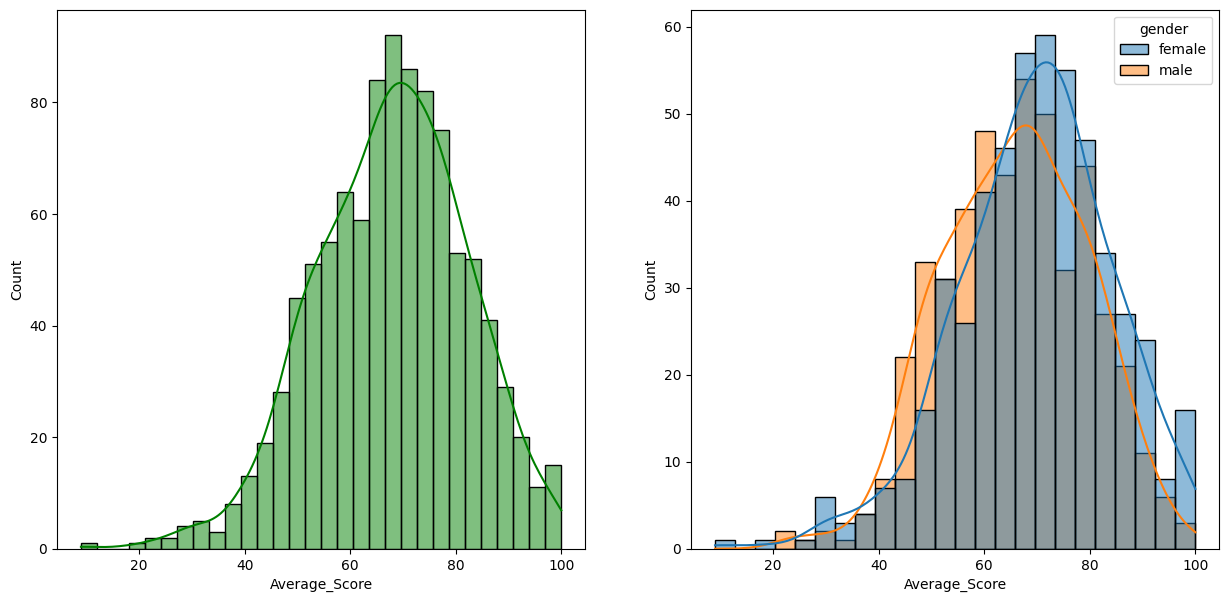

'\nFemale Students tends to perform well then the male students in the test.\n'

In [17]:
fig,axs=plt.subplots(1,2 ,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="Average_Score",ax=axs[0],bins=30,kde=True,color="g")
plt.subplot(122)
sns.histplot(data=df,x="Average_Score",kde=True,hue="gender")
plt.show()




###Observation
'''
Female Students tends to perform well then the male students in the test.
'''






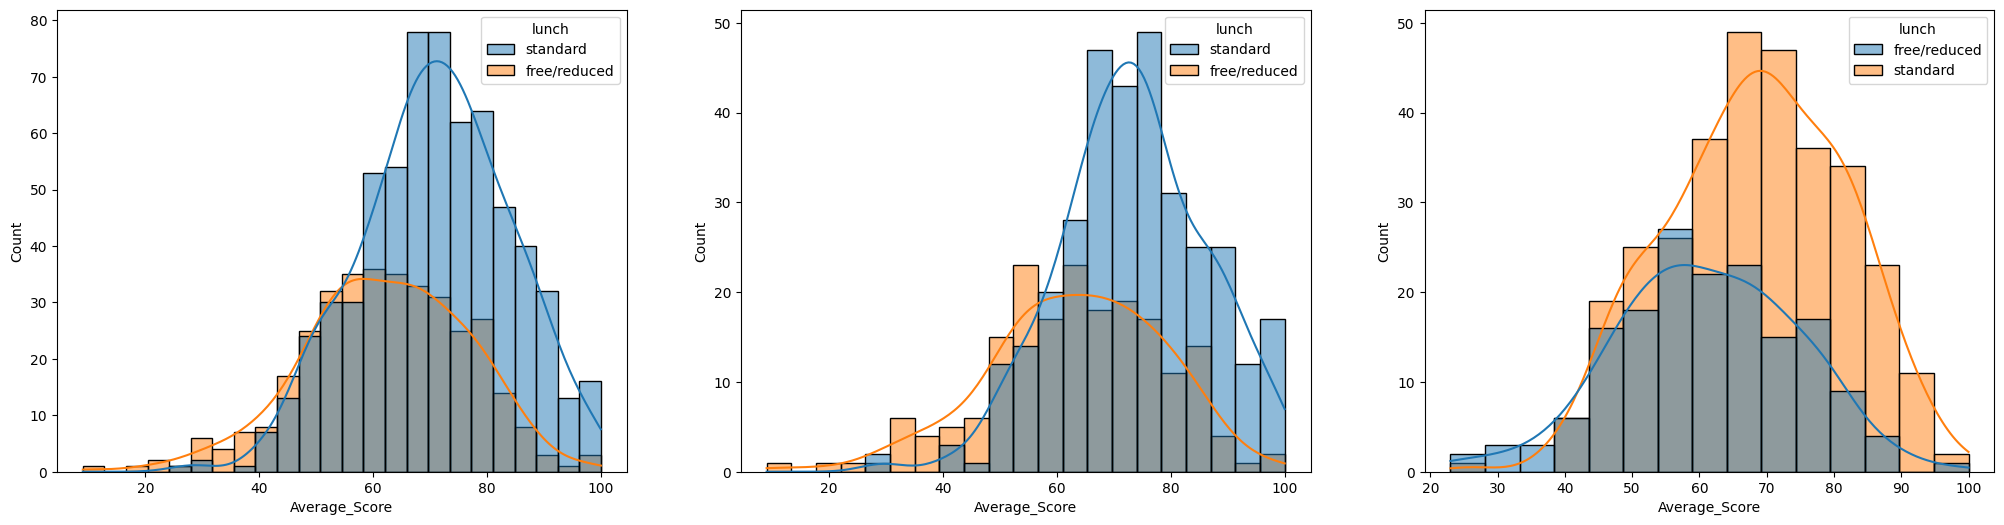

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x="Average_Score",hue="lunch",kde=True)
plt.subplot(132)
sns.histplot(data=df[df['gender']=="female"],x="Average_Score",hue="lunch",kde=True)
plt.subplot(133)
sns.histplot(data=df[df['gender']=="male"],x="Average_Score",hue="lunch",kde=True)
plt.show()


In [19]:
##Observation
'''
Standard lunch helps to perform well in exam either male or female.

'''


'\nStandard lunch helps to perform well in exam either male or female.\n\n'

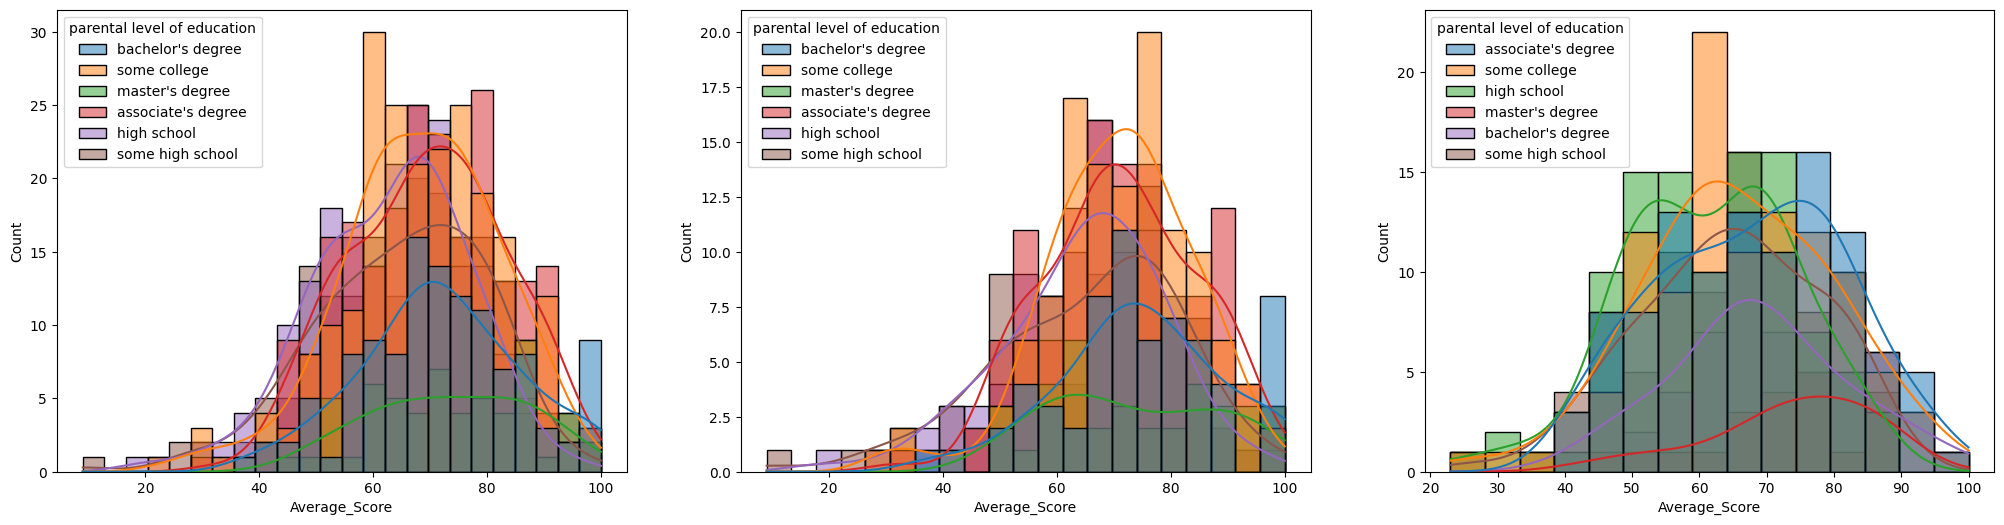

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
axs=sns.histplot(data=df,x='Average_Score',hue="parental level of education",kde=True,color='b')
plt.subplot(132)
axs=sns.histplot(data=df[df["gender"]=="female"],hue="parental level of education",x='Average_Score',kde=True,color='g')
plt.subplot(133)
axs=sns.histplot(data=df[df["gender"]=="male"],hue="parental level of education",x='Average_Score',kde=True,color='r')
plt.show()

##INSIGHTS

- In general parent's education don't help student perform well in exam.
- 3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 2nd plot we can see there is no effect of parent's education on female students.

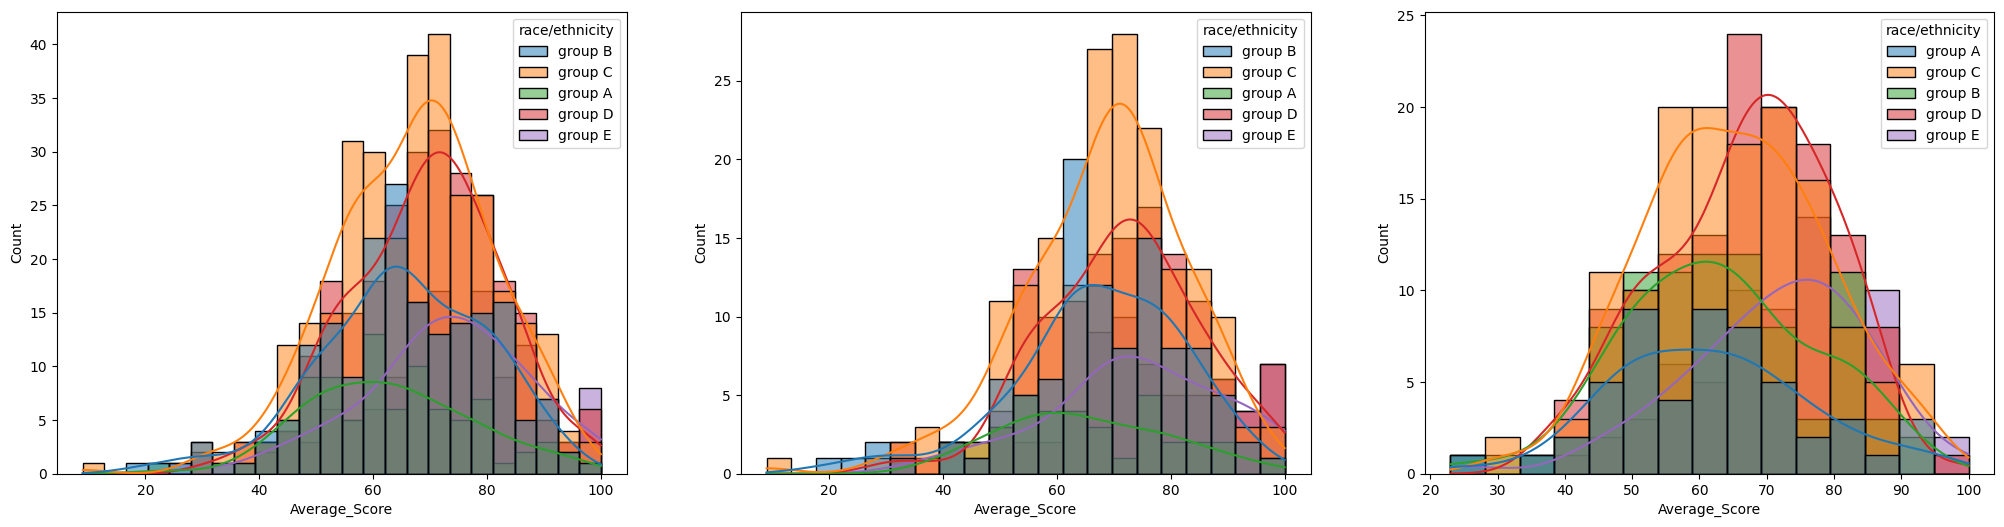

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax1 = sns.histplot(data=df,x='Average_Score',hue="race/ethnicity",kde=True,color='b')
plt.subplot(132)
ax2 = sns.histplot(data=df[df['gender']=='female'],x="Average_Score",hue="race/ethnicity",kde=True,color='g')
plt.subplot(133)
ax3 = sns.histplot(data=df[df['gender']=='male'],x="Average_Score",hue="race/ethnicity",kde=True,color='r')
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

##Max Score Of Students in all Three Subjects

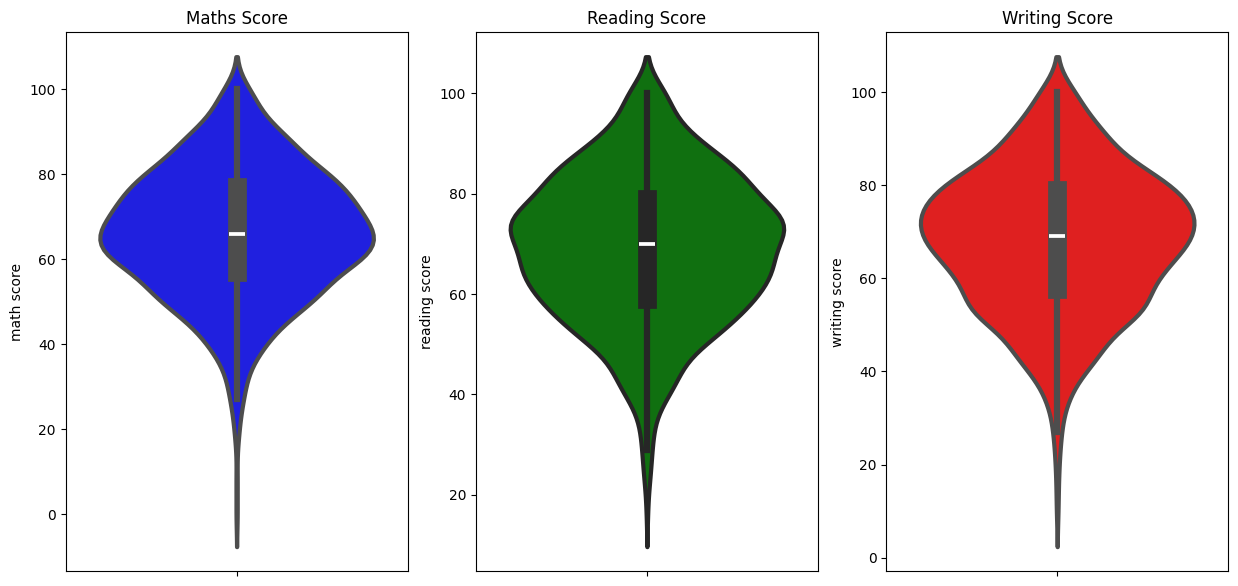

In [22]:
plt.figure(figsize=(15,7))
plt.subplot(131)
plt.title("Maths Score")
sns.violinplot(y='math score',data=df,color='b',linewidth=3)
plt.subplot(132)
plt.title("Reading Score")
sns.violinplot(y='reading score',data=df,color='g',linewidth=3)
plt.subplot(133)
plt.title("Writing Score")
sns.violinplot(y='writing score',data=df,color='r',linewidth=3)
plt.show()

##Multivariate Analysis Using the pieplot


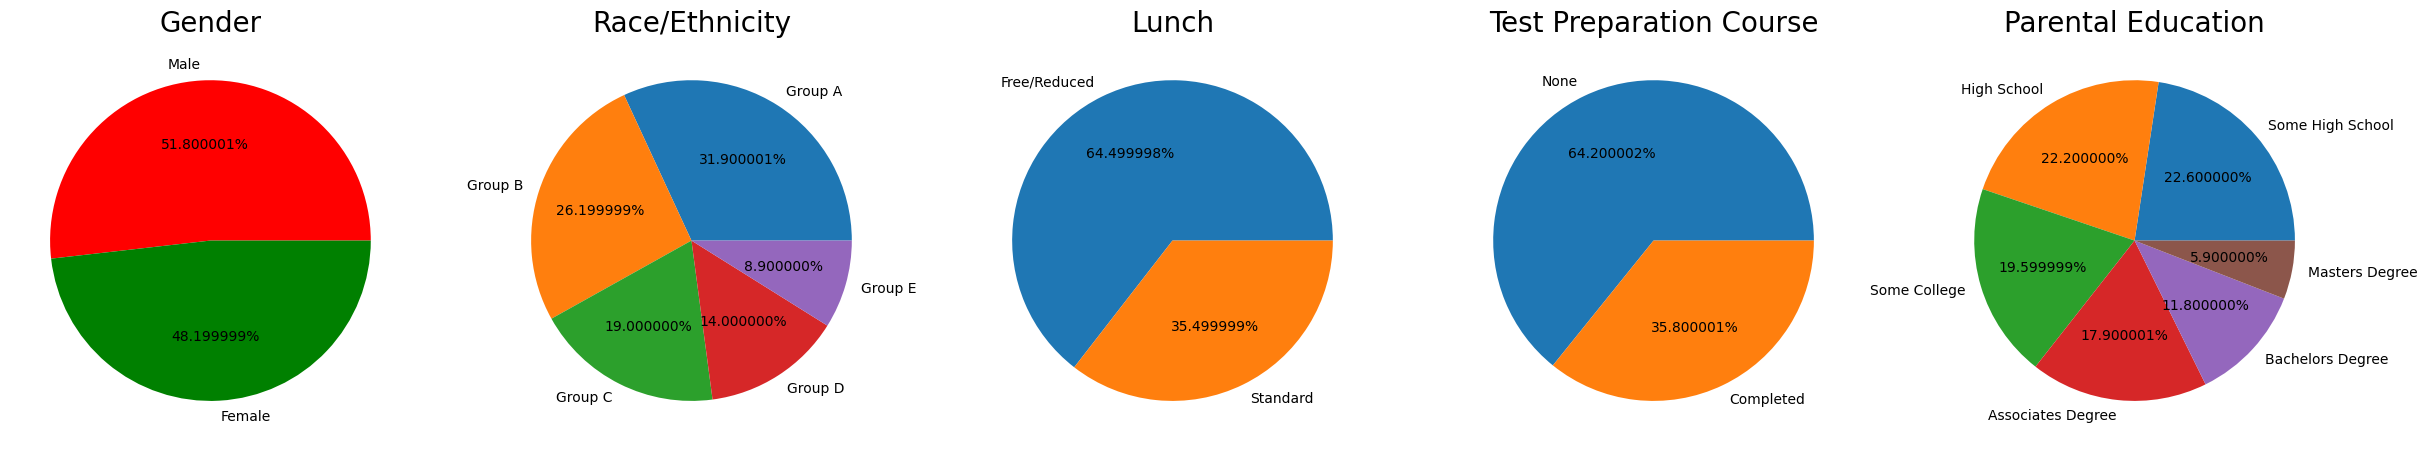

In [23]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(151)
size= df['gender'].value_counts()
labels='Male','Female'
color=['red','green']


plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title("Gender",fontsize=20)
plt.axis('off')

plt.subplot(152)
size= df['race/ethnicity'].value_counts()
labels=['Group A','Group B','Group C','Group D','Group E']

plt.pie(size,labels=labels,autopct='%2f%%')
plt.title("Race/Ethnicity",fontsize=20)
plt.axis('off')

plt.subplot(153)
size= df['lunch'].value_counts()
labels=['Free/Reduced','Standard']

plt.pie(size,labels=labels,autopct='%2f%%')
plt.title("Lunch",fontsize=20)
plt.axis('off')


plt.subplot(154)
size= df['test preparation course'].value_counts()
labels=['None','Completed']

plt.pie(size,labels=labels,autopct='%2f%%')
plt.title("Test Preparation Course",fontsize=20)


plt.subplot(155)
size= df['parental level of education'].value_counts()
labels=['Some High School','High School','Some College','Associates Degree','Bachelors Degree','Masters Degree']

plt.pie(size,labels=labels,autopct='%2f%%')
plt.title("Parental Education",fontsize=20)
plt.axis('off')

plt.show()

##Feature Wise Vizualisation

##Gender Column

1. How is Distribution of Gender?
2. Is Gender has any impact on Student Performance ?


##Univariate Analysis(How is Distribution of Gender?)

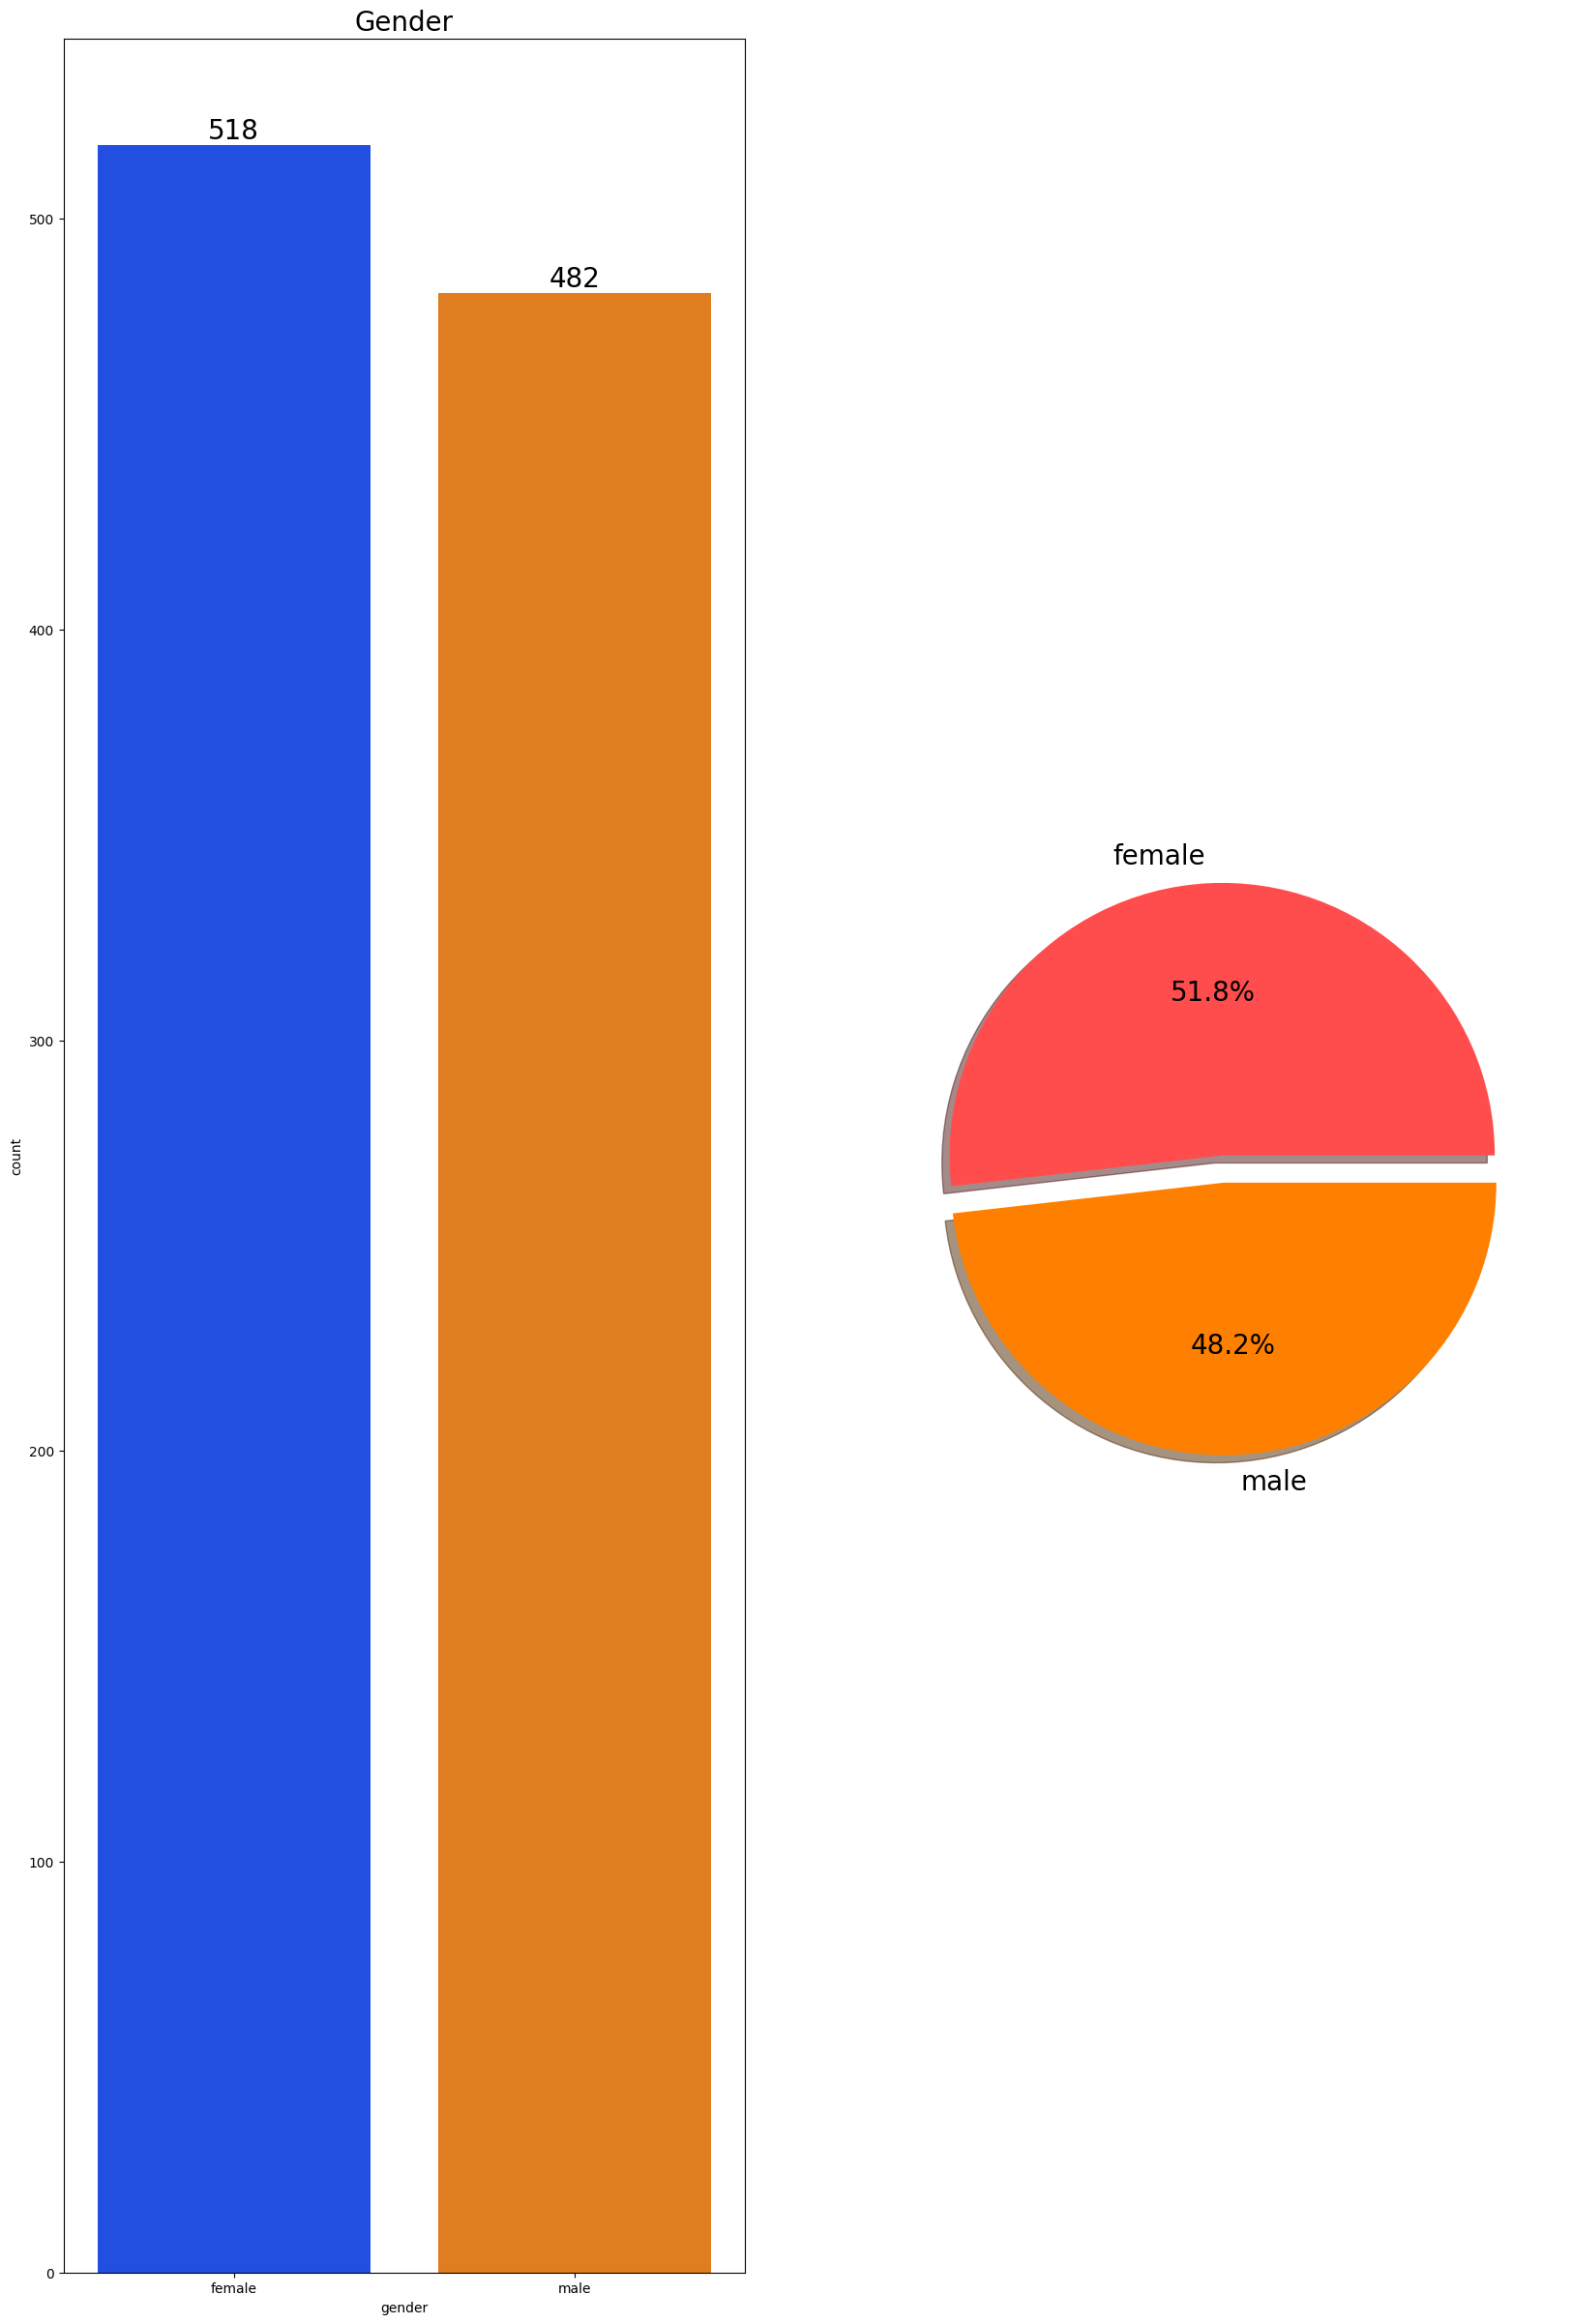

In [24]:
f,ax=plt.subplots(1,2,figsize=(20,30))
sns.countplot(data=df,x=df['gender'],palette='bright',ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['gender'].value_counts(),labels=df['gender'].value_counts().index,explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'],textprops={'fontsize':20})
ax[0].set_title('Gender',size=20)
plt.show()

##Bivariate Analysis(Is gender has any impact on Students Performance)

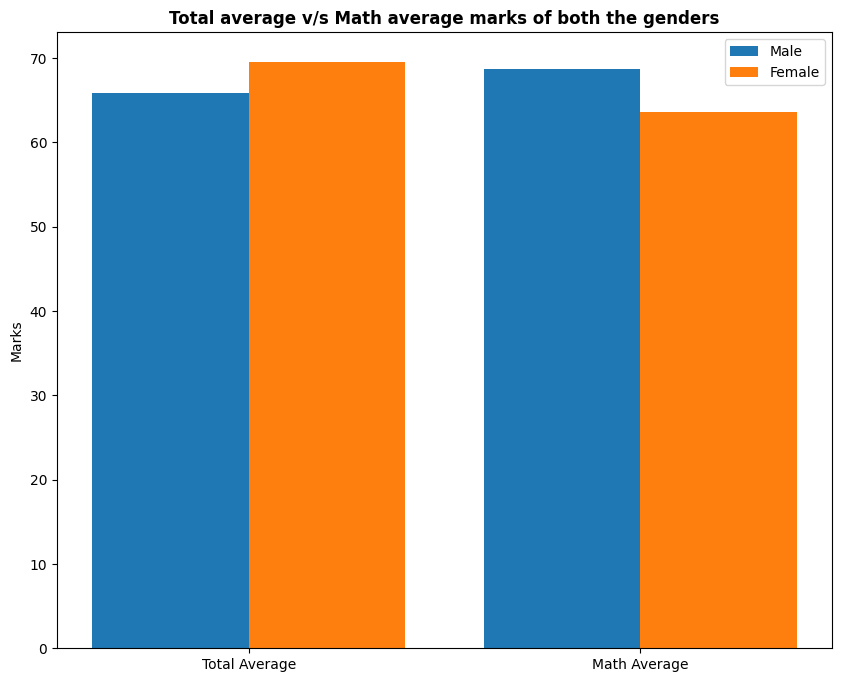

In [25]:
gender_group = df.groupby('gender')[['Total_Score', 'math score', 'reading score', 'writing score', 'Average_Score']].mean()
gender_group
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['Average_Score'][0], gender_group['math score'][0]]
male_scores = [gender_group['Average_Score'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

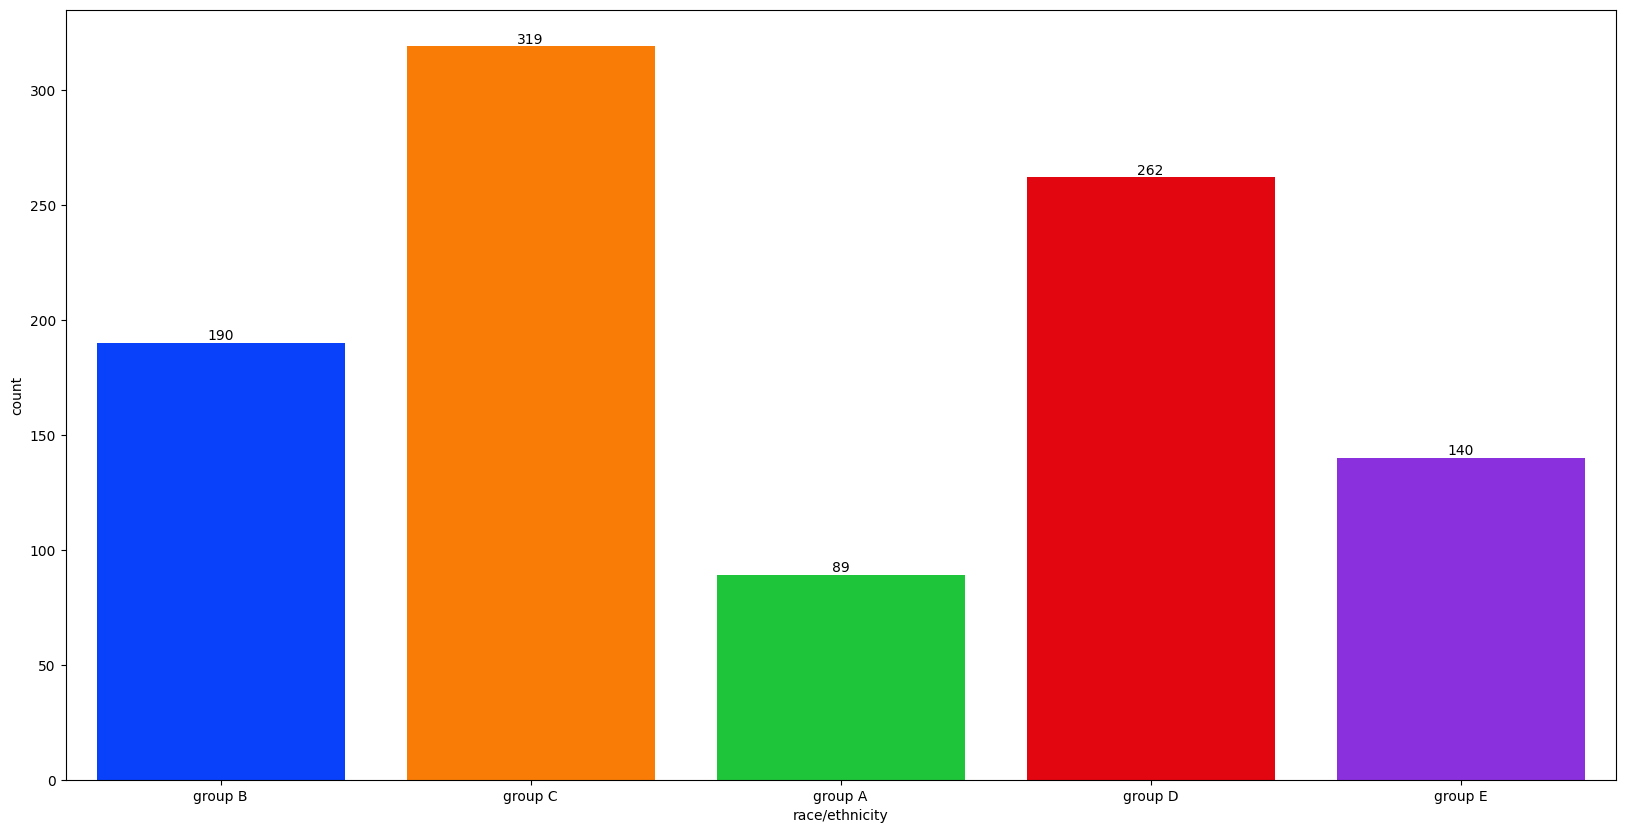

In [26]:
f,ax=plt.subplots(figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette='bright',ax=ax,saturation=0.95)
for conatainers in ax.containers:
    ax.bar_label(conatainers)
plt.show()

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

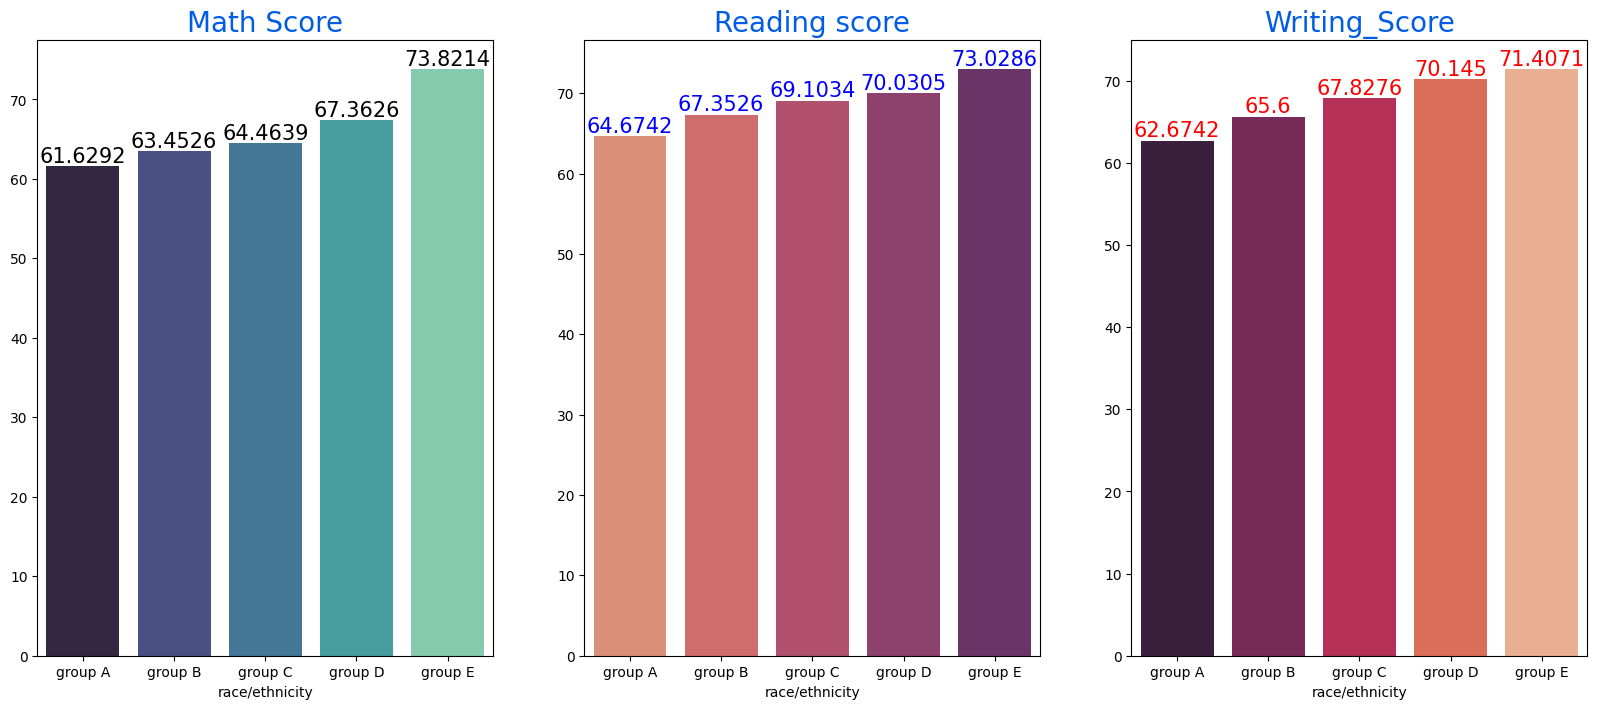

In [27]:
Group_data=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data['math score'].mean().index,y=Group_data['math score'].mean().values,palette='mako',ax=ax[0])
ax[0].set_title("Math Score",color='#005ce6',size=20)


for container in ax[0].containers:
  ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data['reading score'].mean().index,y=Group_data['reading score'].mean().values,palette='flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
  ax[1].bar_label(container,color='blue',size=15)

sns.barplot(x=Group_data['writing score'].mean().index,y=Group_data['writing score'].mean().values,palette='rocket',ax=ax[2])
ax[2].set_title('Writing_Score',color='#005ce6',size=20)

for container in ax[2].containers:
  ax[2].bar_label(container,color='red',size=15)

plt.show()

#### Insights
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?




#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

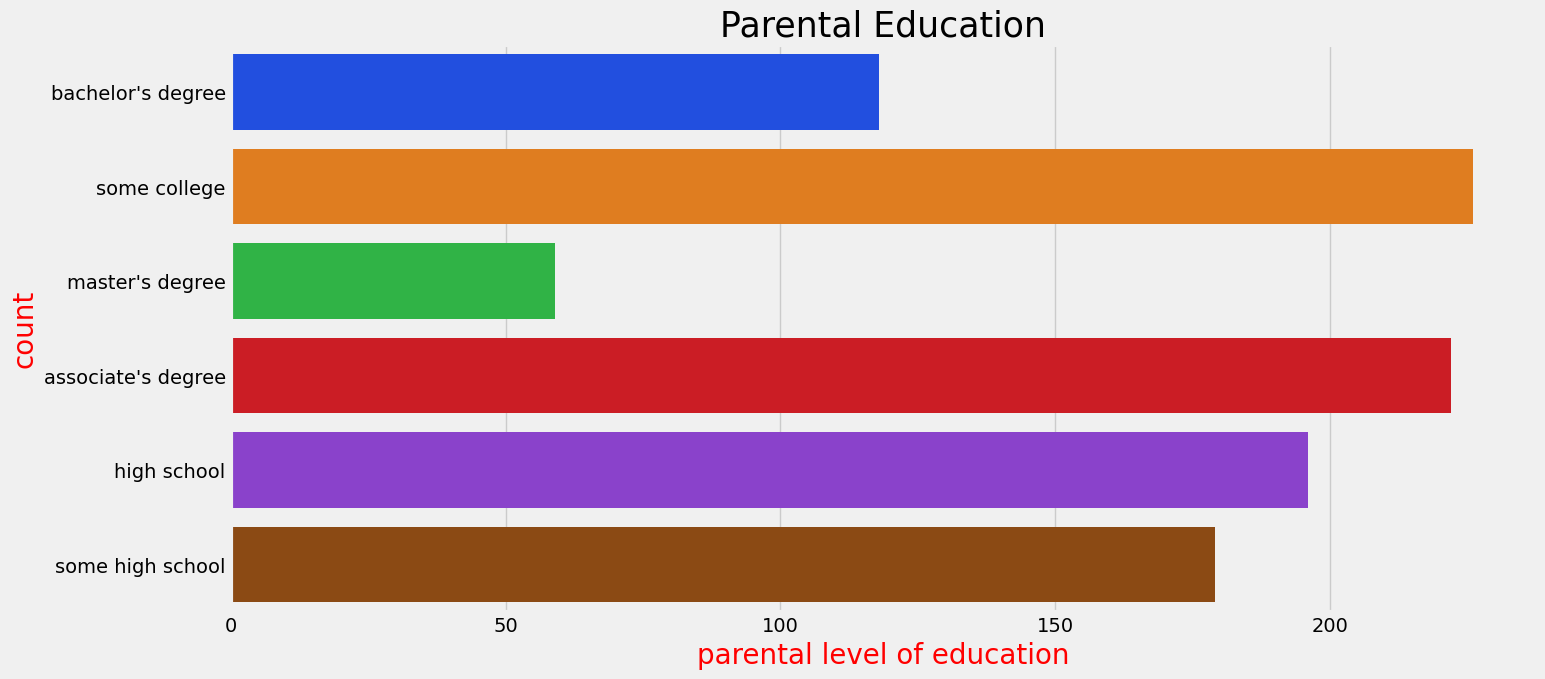

In [28]:
plt.rcParams['figure.figsize']=(15,7)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'],palette='bright')
plt.title('Parental Education',color='black',size=25)
plt.xlabel('parental level of education',color='red',size=20)
plt.ylabel('count',color='red',size=20)
plt.show()

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )


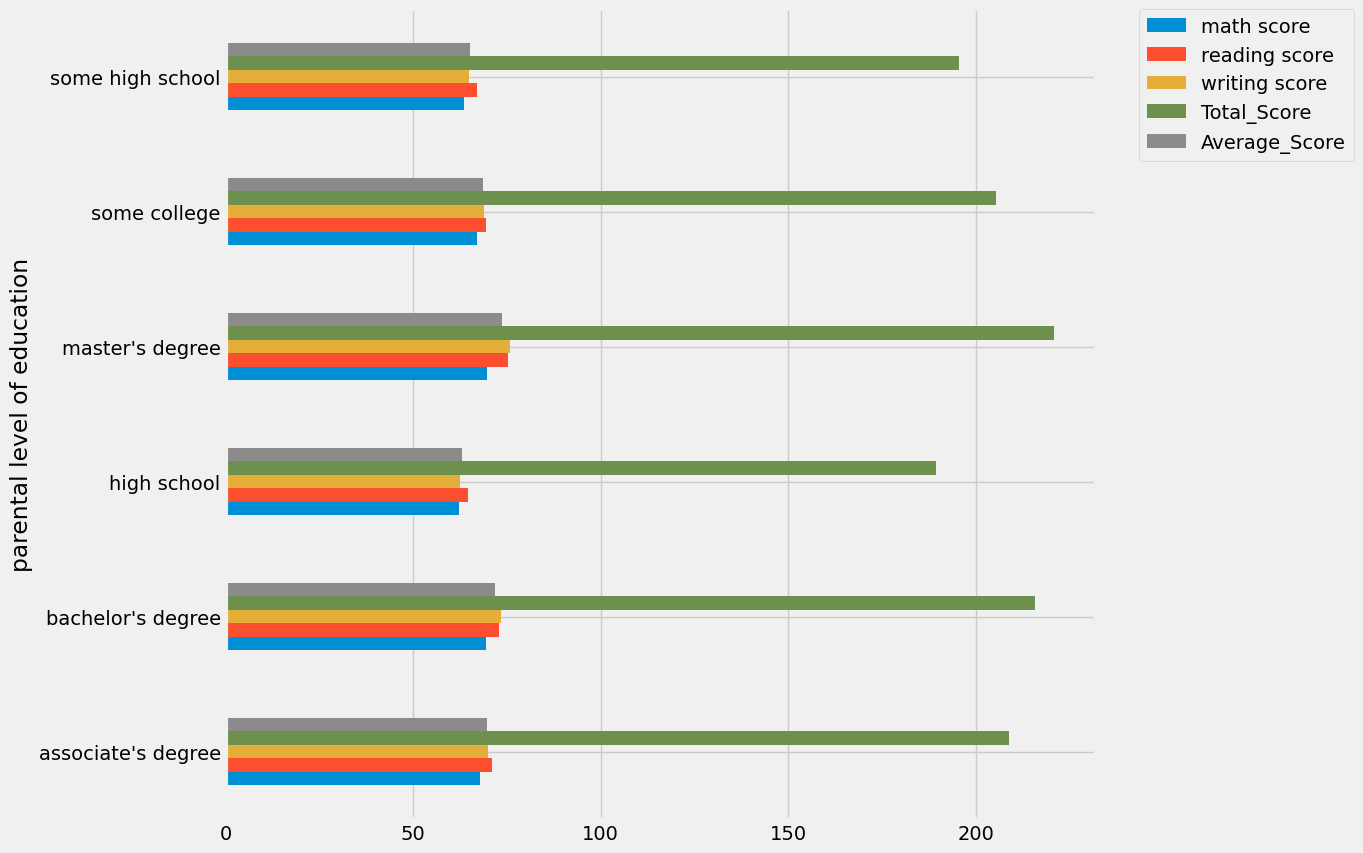

In [29]:
df.groupby('parental level of education').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

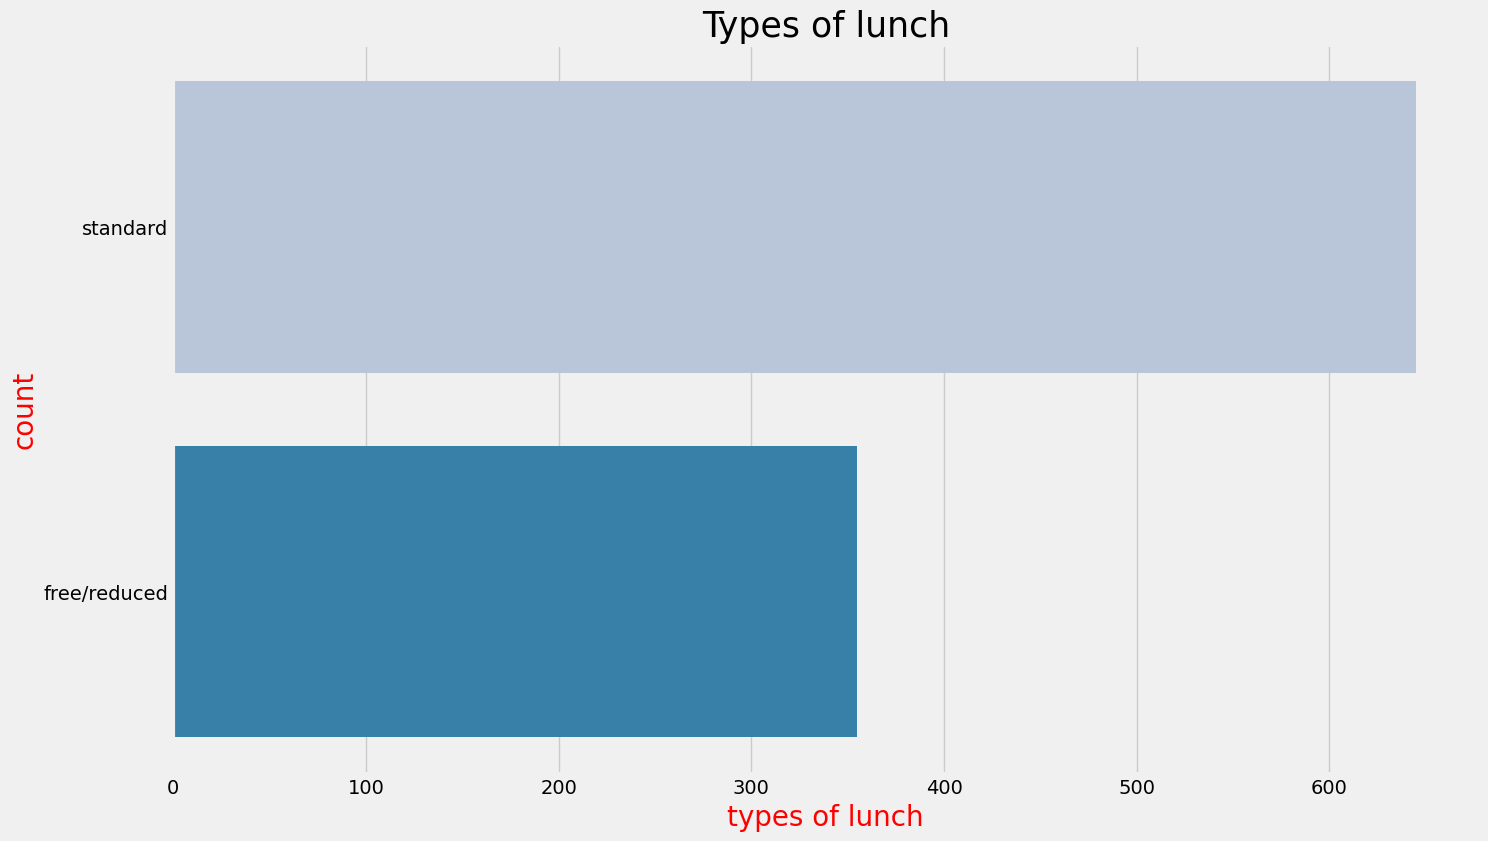

In [30]:
plt.rcParams['figure.figsize']=(15,9)

sns.countplot(df['lunch'],palette='PuBu')
plt.title('Types of lunch',color='black',size=25)
plt.xlabel('types of lunch',color='red',size=20)
plt.ylabel('count',color='red',size=20)
plt.show()

#### Insights
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )


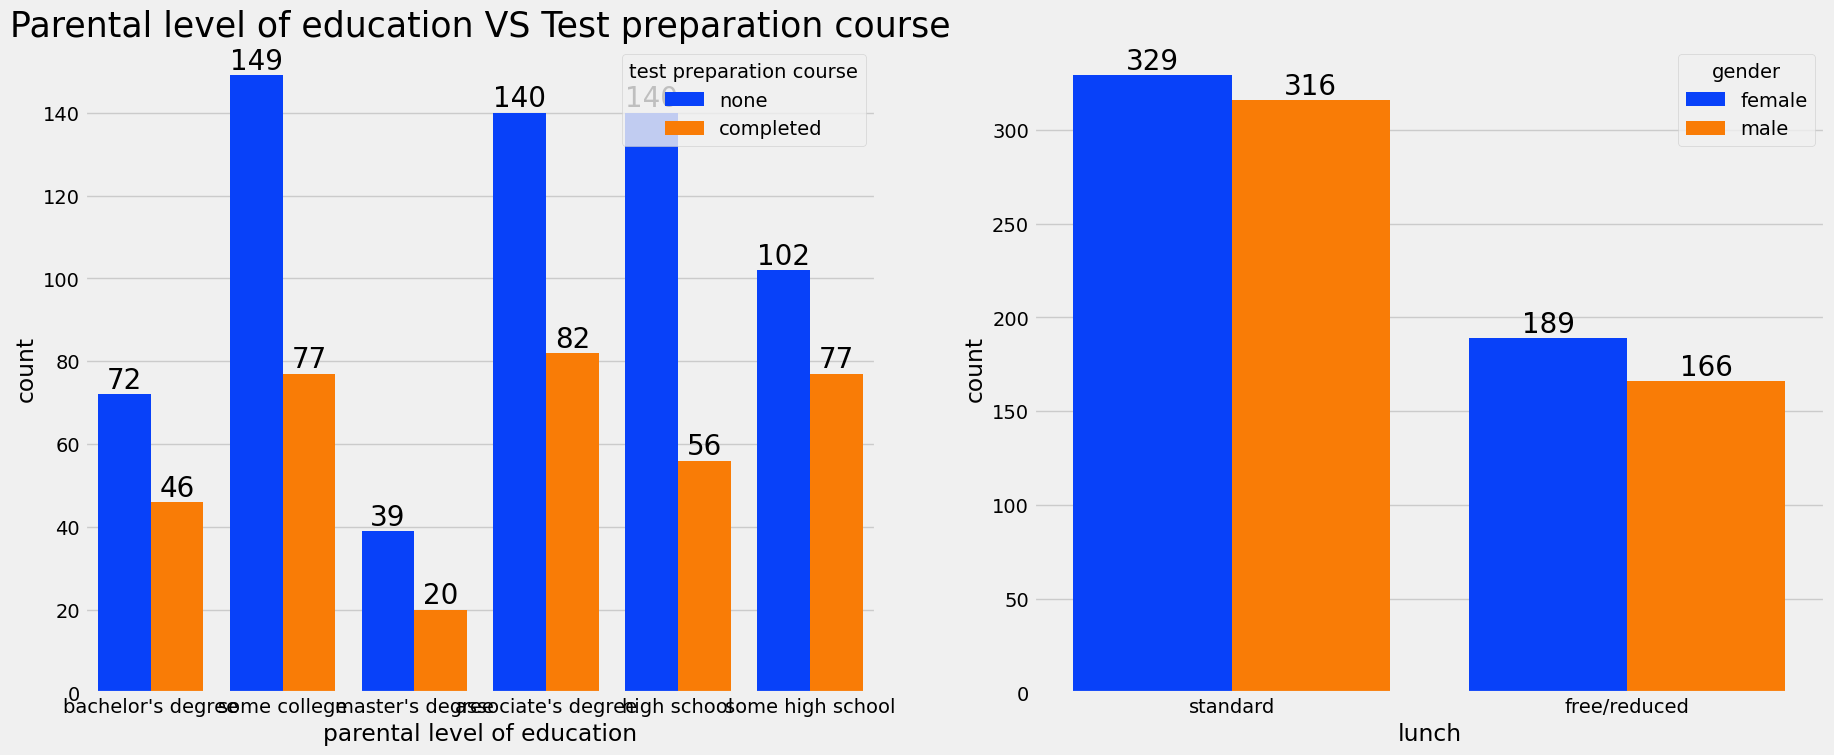

In [31]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(data=df,x=df['parental level of education'],hue='test preparation course',palette='bright',saturation=0.95,ax=ax[0])
ax[0].set_title("Parental level of education VS Test preparation course",color='black',size=25)

for container in ax[0].containers:
  ax[0].bar_label(container,color='black',size=20)

sns.countplot(data=df,x=df['lunch'],hue='gender',palette='bright',saturation=0.95,ax=ax[1])
#ax[1].set_title("Luch VS Gender",color='balck',size=25)

for container in ax[1].containers:
  ax[1].bar_label(container,color='black',size=20)


##Checking the outliers

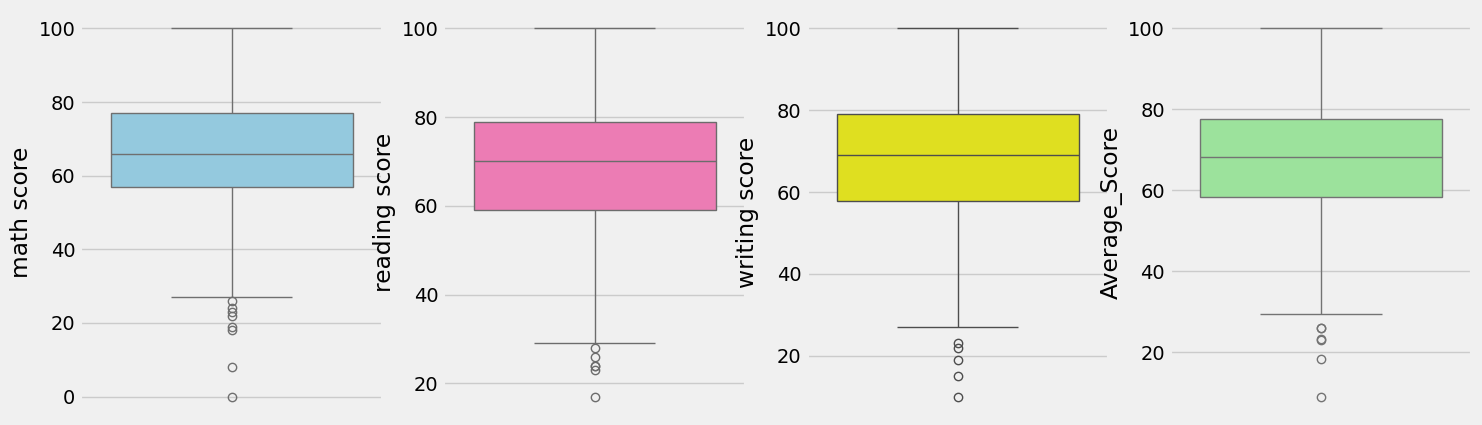

In [32]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average_Score'],color='lightgreen')
plt.show()

##Multivariate Analysis using Pair Plot

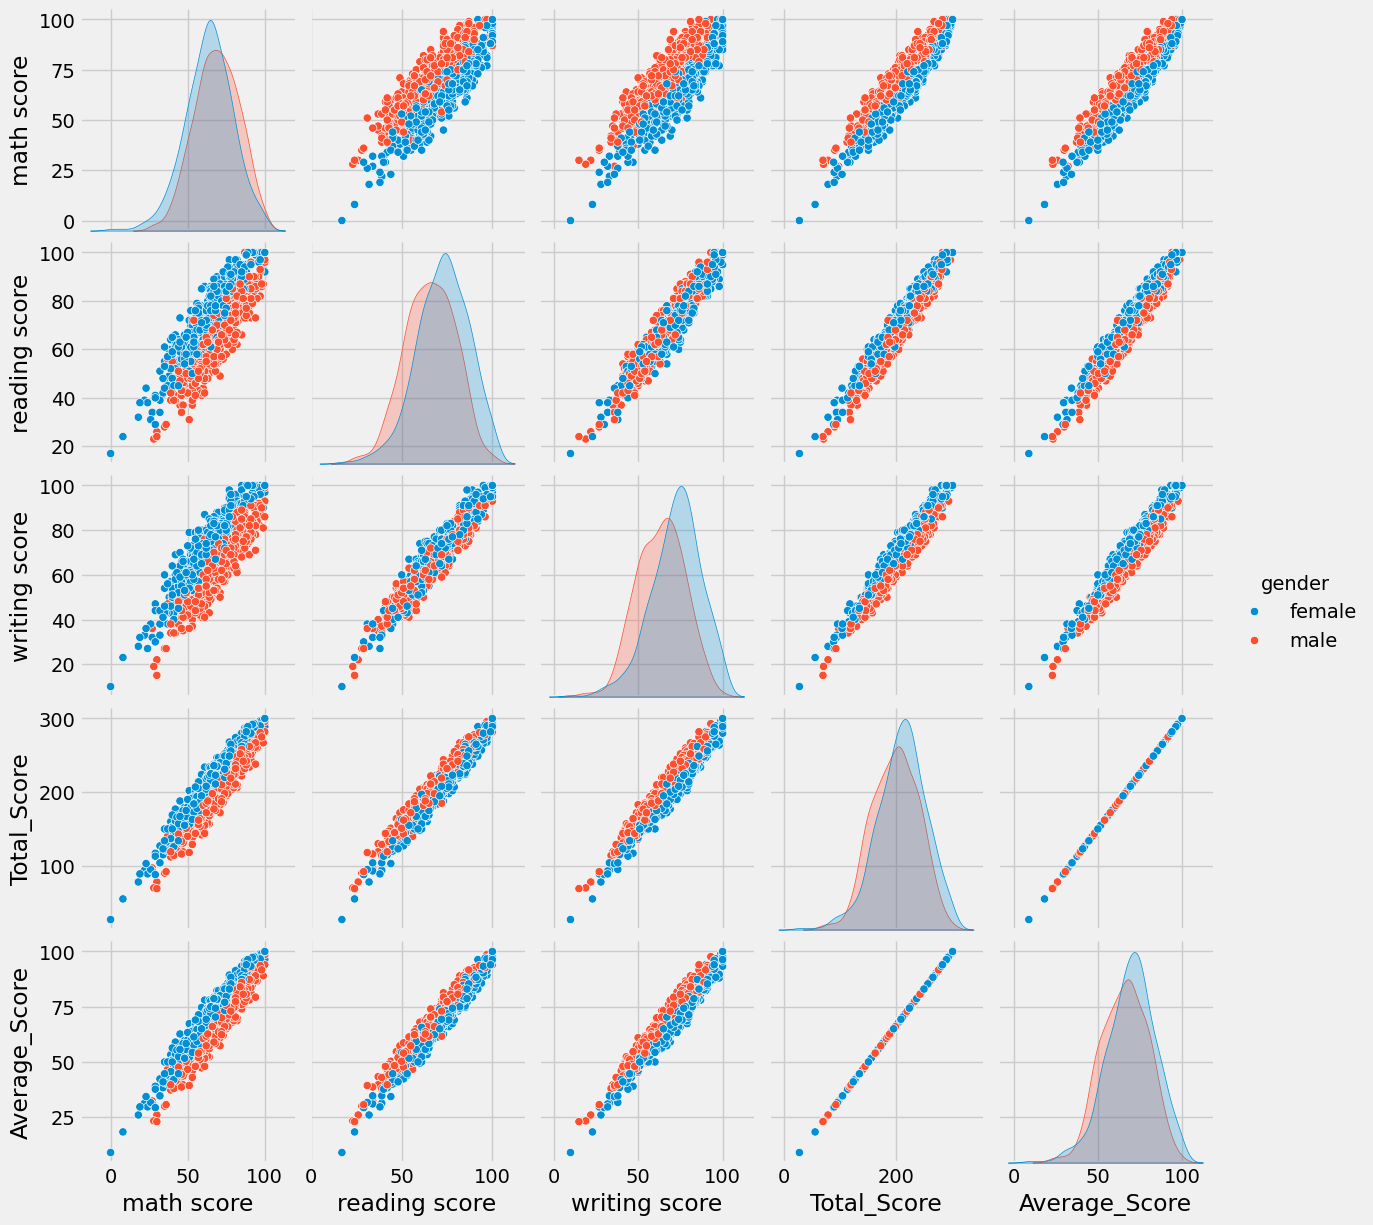

In [33]:
sns.pairplot(df,hue = 'gender')
plt.show()

##Conclusion


- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.